In [1]:
import sklearn
from sklearn import datasets
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import time
import matplotlib.pyplot as plt

In [113]:
data = datasets.make_regression(n_samples=2000, n_features=1, noise=1)
data_X, data_Y = data
data_Y = np.sin(np.abs(0.05 * data_Y) ** 1.05) / data_Y

print(f"X Shape: {data_X.shape}")
print(f"Y Shape: {data_Y.shape}")

X Shape: (2000, 1)
Y Shape: (2000,)


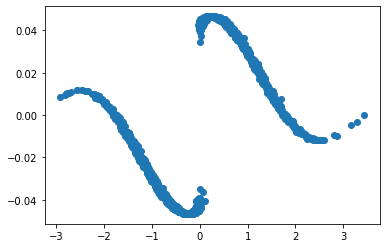

In [114]:
plt.plot(data_X[:,0], data_Y, 'o')
plt.show()

In [115]:
data_X_train, data_X_test, data_Y_train, data_Y_test = train_test_split(data_X, data_Y, test_size=0.20)

In [116]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(250,) * 10, max_iter=int(1e15))
mlp_reg.fit(data_X_train, data_Y_train)
score = mlp_reg.score(data_X_test, data_Y_test)

print(f"R^2 Score: {score}")

R^2 Score: 0.9760706483581674


In [117]:
# Warning! - Polynomial approximation requires (polynomial degree) ^ (input size) coefficients.
degree_approx = 4
num_samples = data_X_train.shape[0]
num_coeffs = degree_approx ** data_X_train.shape[1]
coeffs_shape = (degree_approx,) * data_X_train.shape[1]

print(f"Inputs: {data_X.shape[1]}")
print(f"Degrees: {degree_approx}")
print(f"Matrix Length: {num_coeffs}")

sample_indices = np.random.randint(data_X_train.shape[0], size=num_samples)
sample_values = data_X_train[sample_indices]

# index_flattener = np.array([degree_approx ** k for k in range(data_X_train.shape[1])])

start = time.time()
A = np.zeros((num_samples, num_coeffs))
for k, x in enumerate(sample_values):
    for d, index in enumerate(np.ndindex(*coeffs_shape)):
        A[k, d] = np.prod(np.power(x, index))
        
    end = time.time()
    print(f"Progress ({k+1}/{num_samples}) - Time Elapsed {end - start}s")

Inputs: 1
Degrees: 4
Matrix Length: 4
Progress (1/1600) - Time Elapsed 0.00038433074951171875s
Progress (2/1600) - Time Elapsed 0.0005536079406738281s
Progress (3/1600) - Time Elapsed 0.0006802082061767578s
Progress (4/1600) - Time Elapsed 0.0009016990661621094s
Progress (5/1600) - Time Elapsed 0.001024007797241211s
Progress (6/1600) - Time Elapsed 0.0015876293182373047s
Progress (7/1600) - Time Elapsed 0.0017101764678955078s
Progress (8/1600) - Time Elapsed 0.0018308162689208984s
Progress (9/1600) - Time Elapsed 0.0025398731231689453s
Progress (10/1600) - Time Elapsed 0.0027894973754882812s
Progress (11/1600) - Time Elapsed 0.0029633045196533203s
Progress (12/1600) - Time Elapsed 0.0034339427947998047s
Progress (13/1600) - Time Elapsed 0.003681182861328125s
Progress (14/1600) - Time Elapsed 0.004021167755126953s
Progress (15/1600) - Time Elapsed 0.004292964935302734s
Progress (16/1600) - Time Elapsed 0.0045545101165771484s
Progress (17/1600) - Time Elapsed 0.0048160552978515625s
Progr

Progress (1135/1600) - Time Elapsed 0.20084166526794434s
Progress (1136/1600) - Time Elapsed 0.20192599296569824s
Progress (1137/1600) - Time Elapsed 0.20204615592956543s
Progress (1138/1600) - Time Elapsed 0.202164888381958s
Progress (1139/1600) - Time Elapsed 0.20227837562561035s
Progress (1140/1600) - Time Elapsed 0.20238351821899414s
Progress (1141/1600) - Time Elapsed 0.20247459411621094s
Progress (1142/1600) - Time Elapsed 0.20256447792053223s
Progress (1143/1600) - Time Elapsed 0.20265460014343262s
Progress (1144/1600) - Time Elapsed 0.20274686813354492s
Progress (1145/1600) - Time Elapsed 0.2028360366821289s
Progress (1146/1600) - Time Elapsed 0.2029256820678711s
Progress (1147/1600) - Time Elapsed 0.20301508903503418s
Progress (1148/1600) - Time Elapsed 0.20310449600219727s
Progress (1149/1600) - Time Elapsed 0.20319604873657227s
Progress (1150/1600) - Time Elapsed 0.20328545570373535s
Progress (1151/1600) - Time Elapsed 0.20337414741516113s
Progress (1152/1600) - Time Elapsed

In [118]:
start = time.time()
predicted_Y = mlp_reg.predict(sample_values)
beta = np.linalg.lstsq(A, predicted_Y)
end = time.time()
print(f"Time Elapsed {end - start}s")

Time Elapsed 0.05298948287963867s


/home/matt/.local/share/virtualenvs/dev-z25uTSaL/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [119]:
def compute_value(x):
    s = 0.0
    for d, index in enumerate(np.ndindex(*coeffs_shape)):
        s += np.prod(np.power(x, index))
    return s

In [120]:
y_nn_predicted = mlp_reg.predict(data_X_test)
y_poly_predicted = np.zeros_like(data_Y_test)
start = time.time()
for k in range(len(y_poly_predicted)):
    y_poly_predicted[k] = compute_value(data_X_test[k])
    end = time.time()
    print(f"Progress ({k+1}/{len(y_poly_predicted)}) - Time Elapsed {end - start}s")

Progress (1/400) - Time Elapsed 0.00024127960205078125s
Progress (2/400) - Time Elapsed 0.0006163120269775391s
Progress (3/400) - Time Elapsed 0.0008165836334228516s
Progress (4/400) - Time Elapsed 0.0010113716125488281s
Progress (5/400) - Time Elapsed 0.0012056827545166016s
Progress (6/400) - Time Elapsed 0.0013990402221679688s
Progress (7/400) - Time Elapsed 0.0015904903411865234s
Progress (8/400) - Time Elapsed 0.0017812252044677734s
Progress (9/400) - Time Elapsed 0.0019707679748535156s
Progress (10/400) - Time Elapsed 0.0021610260009765625s
Progress (11/400) - Time Elapsed 0.0023527145385742188s
Progress (12/400) - Time Elapsed 0.002542257308959961s
Progress (13/400) - Time Elapsed 0.0027332305908203125s
Progress (14/400) - Time Elapsed 0.002923727035522461s
Progress (15/400) - Time Elapsed 0.00311279296875s
Progress (16/400) - Time Elapsed 0.0033075809478759766s
Progress (17/400) - Time Elapsed 0.0034971237182617188s
Progress (18/400) - Time Elapsed 0.0036847591400146484s
Progres

In [121]:
print(f"R^2 Score NN: {r2_score(data_Y_test, y_nn_predicted)}")
print(f"R^2 Score Poly: {r2_score(data_Y_test, y_poly_predicted)}")

R^2 Score NN: 0.9760706483581673
R^2 Score Poly: -16376.928699718534
